<a href="https://colab.research.google.com/github/Nsho0724/Covertype/blob/main/Covertype_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# covertye
## 1. ライブラリーのインストール

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/drive/My Drive/CyberAgent/Covtype/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sample_submission = pd.read_csv(path + "sampleSubmission.csv")

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 1000000)

## 2.データの確認/欠損値など

In [5]:
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


In [6]:
train.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
test.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [9]:
num_features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

変数|定義
---|---
Elevation|Elevation in meters
Aspect|Aspect in degrees azimuth
Slope|Slope in degrees
Horizontal_Distance_To_Hydrology|Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology|Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways|Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index)|Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index)|Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index)|Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points|Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)|Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence)|Soil Type designation
Cover_Type (7 types, integers 1 to 7)|Forest Cover Type designation


変数                                | 定義 
------------------------------------|---------------------------------------------------
Elevation                           | 標高（メートル） 
Aspect                              | 方位角に対する角度（度） 
Slope                               | 傾斜角度（度） 
Horizontal_Distance_To_Hydrology    | 最寄りの水源までの水平距離 
Vertical_Distance_To_Hydrology      | 最寄りの水源までの垂直距離 
Horizontal_Distance_To_Roadways     | 最寄りの道路までの水平距離 
Hillshade_9am (0 to 255 index)      | 夏至の午前9時の日射指数（0から255までのインデックス） 
Hillshade_Noon (0 to 255 index)     | 夏至の正午の日射指数（0から255までのインデックス） 
Hillshade_3pm (0 to 255 index)      | 夏至の午後3時の日射指数（0から255までのインデックス） 
Horizontal_Distance_To_Fire_Points | 最寄りの山火事発生地点までの水平距離 
Wilderness_Area (4 binary columns)  | 自然保護地域の指定（4つのバイナリ列、0 = 不在、1 = 存在） 
Soil_Type (40 binary columns)       | 土壌タイプの指定（40のバイナリ列、0 = 不在、1 = 存在） 
Cover_Type                          | 森林被覆タイプの指定（7つのタイプ、整数1から7まで） 


In [10]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [11]:
test.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


## 外れ値

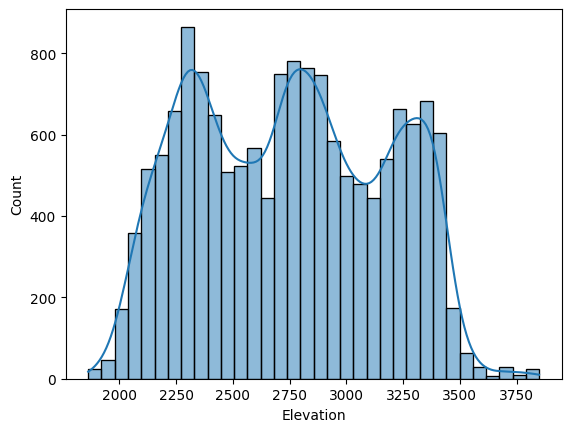

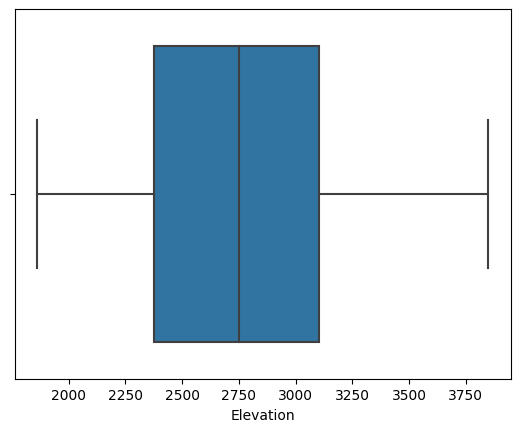

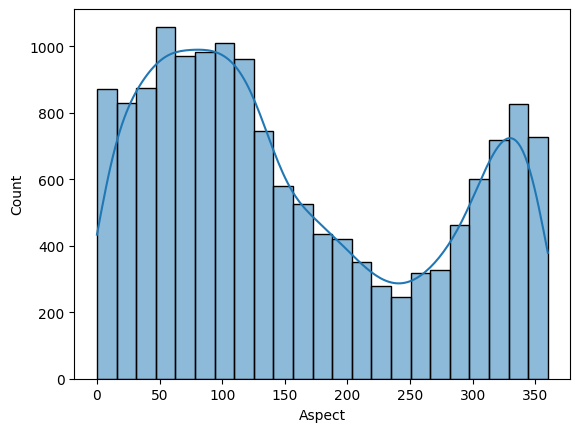

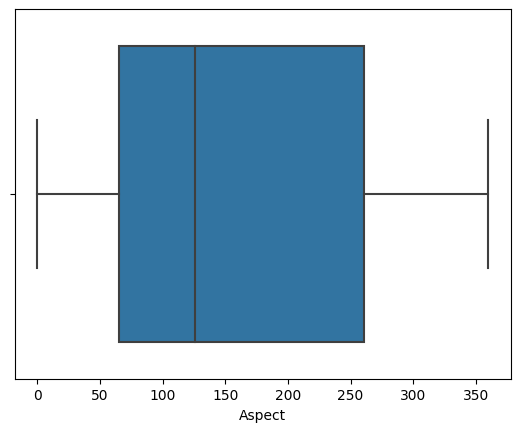

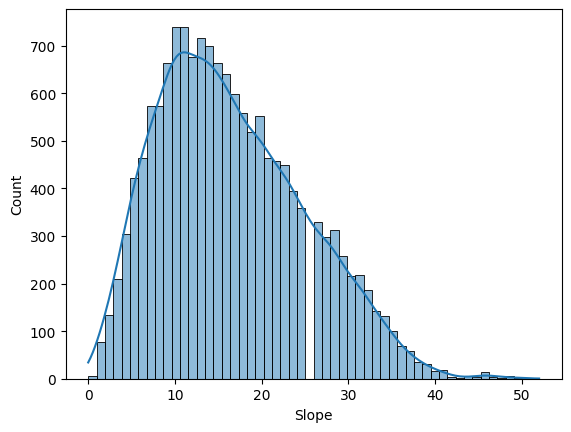

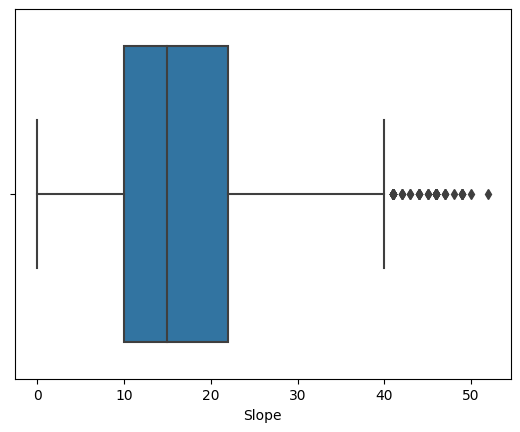

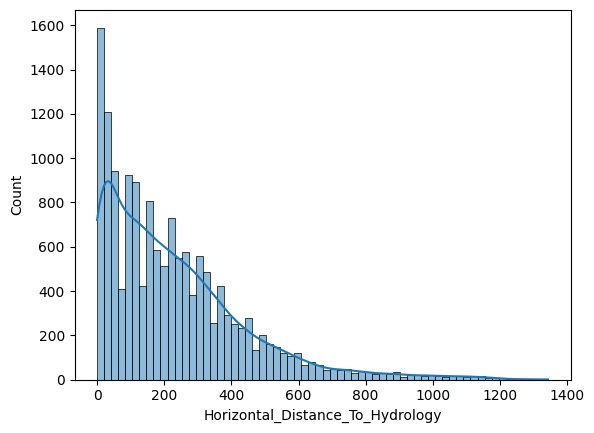

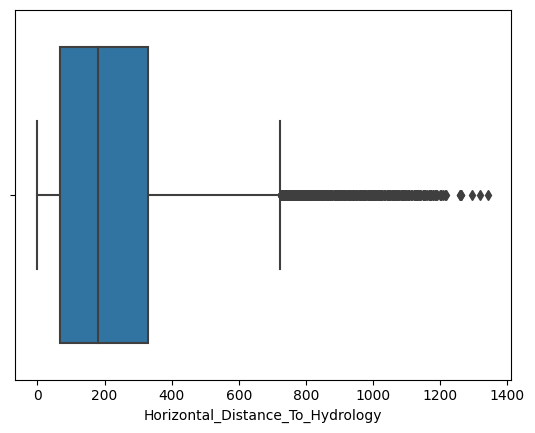

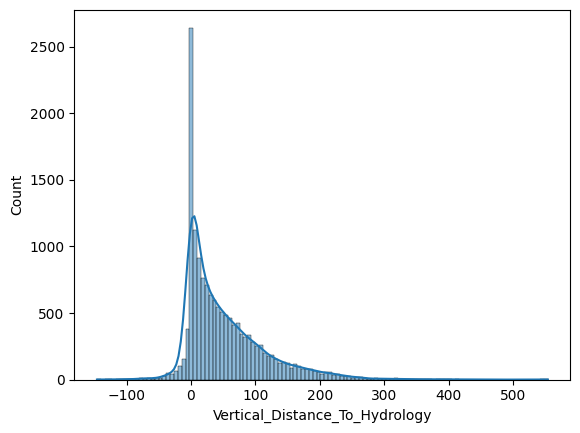

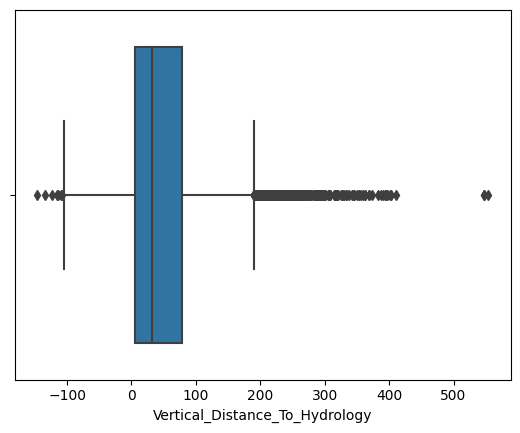

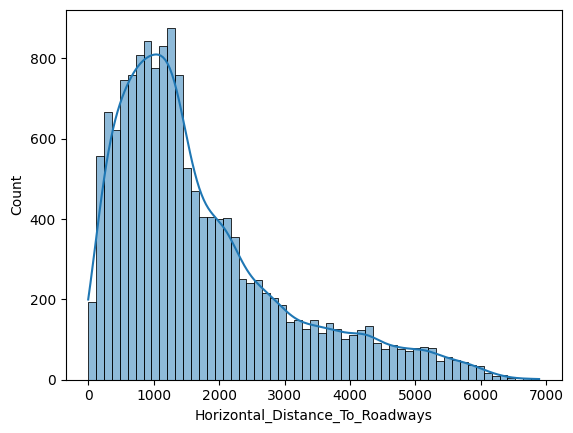

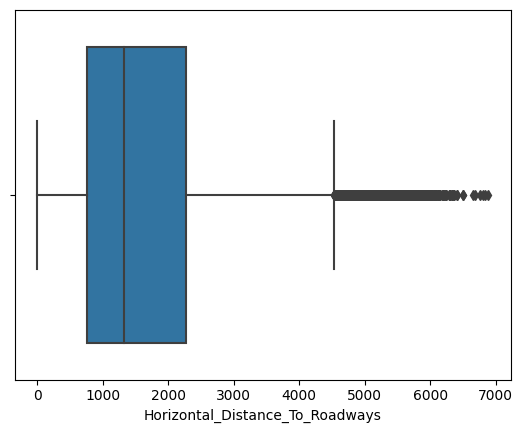

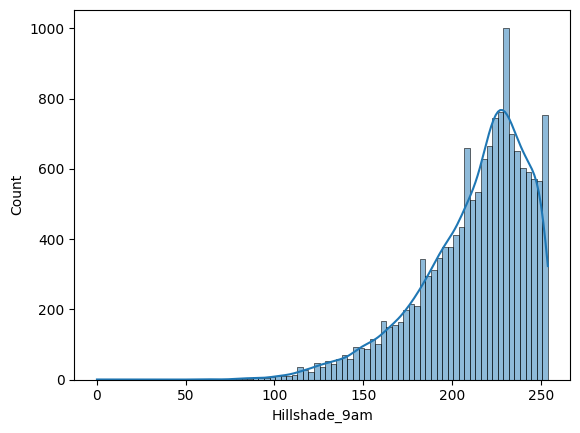

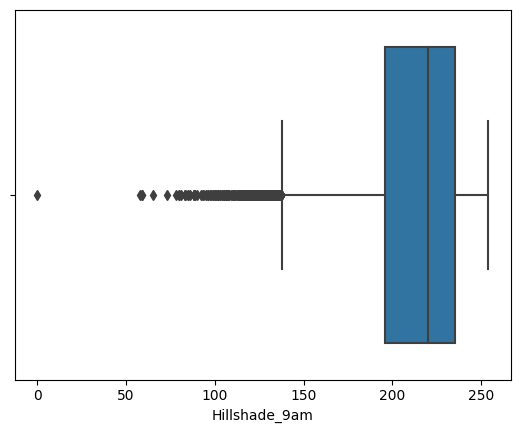

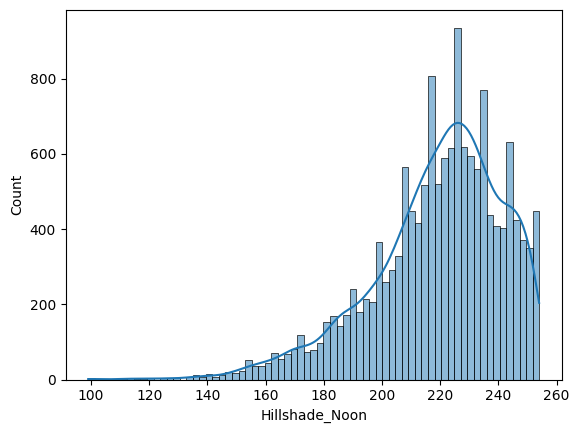

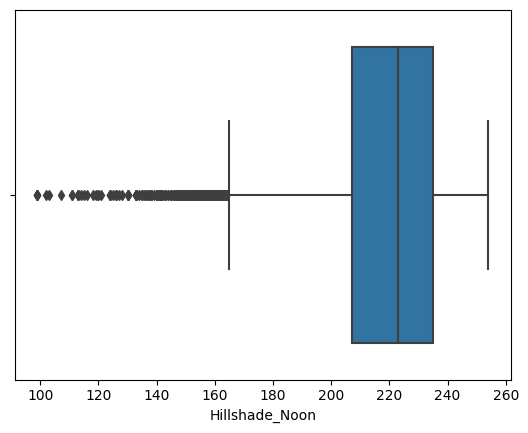

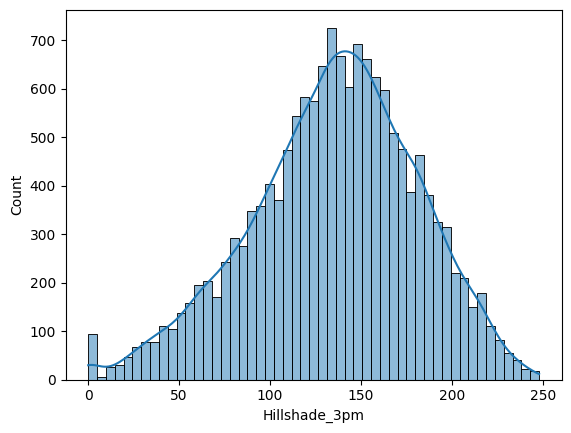

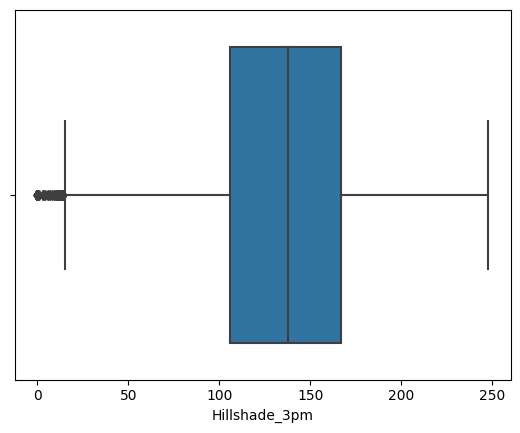

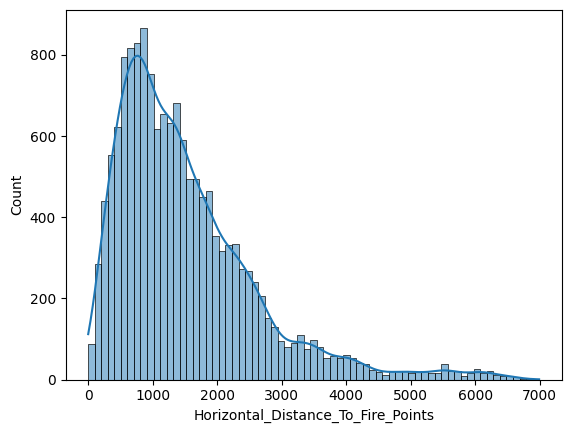

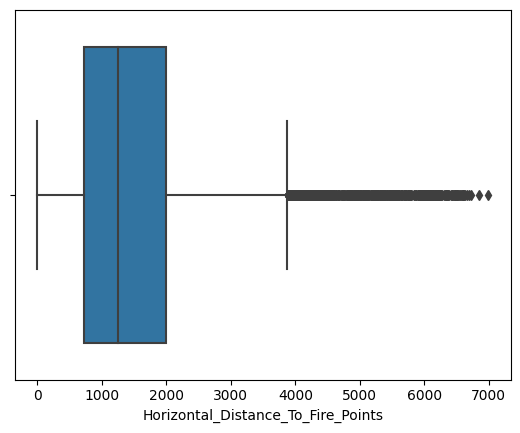

In [12]:
for feature in num_features:
  sns.histplot(data = train, x = feature, kde = True)
  plt.show()
  sns.boxplot(data = train, x = feature)
  plt.show()

外れ値
slope 50以上を50
Horizontal_Distance_To_Hydrology 1200以上を1200
Vertical_Distance_To_Hydrology 500以上を400
Hillshade_9am 0を50
Horizontal_Distance_To_Fire_Points 6800以上を6800

In [13]:
#ほぼ変わらない
# train.loc[train['Slope'] >= 50, 'Slope'] = 50

In [14]:
#少し下がる
# train.loc[train["Horizontal_Distance_To_Hydrology"] >= 1200, "Horizontal_Distance_To_Hydrology"] = 1200

In [15]:
#少し上がった
train.loc[train['Vertical_Distance_To_Hydrology'] >=500,"Vertical_Distance_To_Hydrology"] = 400

In [16]:
test.loc[test['Vertical_Distance_To_Hydrology'] >=500,"Vertical_Distance_To_Hydrology"] = 400

In [17]:
#少し下がる
# train.loc[train["Hillshade_9am"]<=50,"Hillshade_9am"] = 50

In [18]:
#変化なし
# train.loc[train["Horizontal_Distance_To_Fire_Points"]>=6800,"Horizontal_Distance_To_Fire_Points"] = 6800

In [19]:
# # Elevationの外れ値
# elevation_outliers = train[(train['Elevation'] <= train['Elevation'].quantile(0.01)) |
#                                 (train['Elevation'] >= train['Elevation'].quantile(0.99))]
# # 新しい特徴量として抽出
# train['Elevation_outliers'] = (train['Elevation'] <= train['Elevation'].quantile(0.01)).astype(int) | \
#                                    (train['Elevation'] >= train['Elevation'].quantile(0.99)).astype(int)

In [20]:
# # # 上下1%の外れ値を平均値で置き換える
# elevation_lower = train['Elevation'].quantile(0.01)
# elevation_upper = train['Elevation'].quantile(0.99)
# train.loc[train['Elevation'] < elevation_lower, 'Elevation'] = train['Elevation'].mean()
# train.loc[train['Elevation'] > elevation_upper, 'Elevation'] = train['Elevation'].mean()

## 特徴量エンジニアリング（新しい特徴量)
特徴量案

In [21]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [22]:
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [23]:
#水辺までの距離
train['Distance_To_Hydrology'] = train.apply(lambda row: distance(np.array([row['Horizontal_Distance_To_Hydrology'], row['Vertical_Distance_To_Hydrology']]), np.array([0, 0])),axis=1)

In [24]:
test['Distance_To_Hydrology'] = test.apply(lambda row: distance(np.array([row['Horizontal_Distance_To_Hydrology'], row['Vertical_Distance_To_Hydrology']]), np.array([0, 0])),axis=1)

In [25]:
def _distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# 水域と道路に近いか
train['Distance_To_min_Hydrology_Roadways'] = train.apply(lambda row: min(_distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     0),
                                                                                      _distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     row['Vertical_Distance_To_Hydrology'])), axis=1)

In [26]:
test['Distance_To_min_Hydrology_Roadways'] = test.apply(lambda row: min(_distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     0),
                                                                                      _distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     row['Vertical_Distance_To_Hydrology'])), axis=1)

In [27]:
# 水域と道路に遠いか
train['Distance_To_max_Hydrology_Roadways'] = train.apply(lambda row: max(_distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     0),
                                                                                      _distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     row['Vertical_Distance_To_Hydrology'])), axis=1)

In [28]:
test['Distance_To_max_Hydrology_Roadways'] = test.apply(lambda row: max(_distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     0),
                                                                                      _distance(row['Horizontal_Distance_To_Hydrology'],
                                                                                                     row['Vertical_Distance_To_Hydrology'],
                                                                                                     row['Horizontal_Distance_To_Roadways'],
                                                                                                     row['Vertical_Distance_To_Hydrology'])), axis=1)

In [29]:
# 火事地点の重みづけ
# max_distance = max(train["Horizontal_Distance_To_Fire_Points"])
# train["Fire_Distance_Weighted"] = (train["Horizontal_Distance_To_Fire_Points"] / max_distance) * train["Cover_Type"]

In [30]:
# max_distance = max(test["Horizontal_Distance_To_Fire_Points"])
# test["Fire_Distance_Weighted"] = (test["Horizontal_Distance_To_Fire_Points"] / max_distance) * train["Cover_Type"]

In [31]:
# 対数化
train['Log_Elevation'] = np.log(train['Elevation'])

In [32]:
test['Log_Elevation'] = np.log(test['Elevation'])

In [33]:
# 標高変化に対すると傾斜の変化
train['Elevation_Slope'] = train['Elevation'] * train['Slope']

In [34]:
test['Elevation_Slope'] = test['Elevation'] * test['Slope']

In [35]:
# 山の傾斜法傾斜法
train['Elevation_Aspect'] = train['Elevation'] * train['Aspect']

In [36]:
test['Elevation_Aspect'] = test['Elevation'] * test['Aspect']

In [37]:
# 太陽光の角度
train["Sunshine_Angle"] = (train["Hillshade_9am"] + train["Hillshade_Noon"] + train["Hillshade_3pm"]) / 3

In [38]:
test["Sunshine_Angle"] = (test["Hillshade_9am"] + test["Hillshade_Noon"] + train["Hillshade_3pm"]) / 3

In [39]:
corr_matrix = train.corr().abs()

# 相関が高い特徴量のペアを見つける
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 相関が高い特徴量のペアを表示
for pair in high_corr_var:
    print(pair)

('Elevation', 'Log_Elevation')
('Aspect', 'Elevation_Aspect')
('Slope', 'Elevation_Slope')
('Horizontal_Distance_To_Hydrology', 'Distance_To_Hydrology')
('Horizontal_Distance_To_Roadways', 'Distance_To_min_Hydrology_Roadways')
('Horizontal_Distance_To_Roadways', 'Distance_To_max_Hydrology_Roadways')
('Hillshade_Noon', 'Sunshine_Angle')
('Wilderness_Area4', 'Log_Elevation')
('Distance_To_min_Hydrology_Roadways', 'Distance_To_max_Hydrology_Roadways')


kaggleの参加者のコードを参考
https://www.kaggle.com/code/rsizem2/forest-cover-type-feature-engineering


In [40]:
# Mapping soil type to ELU code
ELU_CODE = {
    1:2702,2:2703,3:2704,4:2705,5:2706,6:2717,7:3501,8:3502,9:4201,
    10:4703,11:4704,12:4744,13:4758,14:5101,15:5151,16:6101,17:6102,
    18:6731,19:7101,20:7102,21:7103,22:7201,23:7202,24:7700,25:7701,
    26:7702,27:7709,28:7710,29:7745,30:7746,31:7755,32:7756,33:7757,
    34:7790,35:8703,36:8707,37:8708,38:8771,39:8772,40:8776
}

In [41]:
# Encode soil type ordinally
def categorical_encoding(input_df):
    data = input_df.copy()
    data['Soil_Type'] = 0
    for i in range(1,41):
        data['Soil_Type'] += i*data[f'Soil_Type{i}']
    return data

In [42]:
# Encode soil type
train = categorical_encoding(train)
test = categorical_encoding(test)

# Original soil features
soil_features = [f'Soil_Type{i}' for i in range(1,41)]

In [43]:
def climatic_zone(input_df):
    df = input_df.copy()
    df['Climatic_Zone'] = input_df['Soil_Type'].apply(
        lambda x: int(str(ELU_CODE[x])[0])
    )
    return df

In [44]:
# Climatic Zone
train = climatic_zone(train)
test = climatic_zone(test)

In [45]:
def rock_size(input_df):
    
    # Group IDs
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stones = [1,2,6,9,12,18,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40]
    boulders = [22]
    rubble = [3,4,5,10,11,13]

    # Create dictionary
    rock_size = {i:0 for i in no_desc}
    rock_size.update({i:1 for i in stones})
    rock_size.update({i:2 for i in boulders})
    rock_size.update({i:3 for i in rubble})
    
    df = input_df.copy()
    df['Rock_Size'] = input_df['Soil_Type'].apply(
        lambda x: rock_size[x]
    )
    return df


In [46]:
# Rock_Size
train = rock_size(train)
test = rock_size(test)

In [47]:
def surface_cover(input_df):
    # Group IDs
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stony = [6,12]
    very_stony = [2,9,18,26]
    extremely_stony = [1,22,24,25,27,28,29,30,31,32,33,34,36,37,38,39,40]
    rubbly = [3,4,5,10,11,13]

    # Create dictionary
    surface_cover = {i:0 for i in no_desc}
    surface_cover.update({i:1 for i in stony})
    surface_cover.update({i:2 for i in very_stony})
    surface_cover.update({i:3 for i in extremely_stony})
    surface_cover.update({i:4 for i in rubbly})
    
    # Create Feature
    df = input_df.copy()
    df['Surface_Cover'] = input_df['Soil_Type'].apply(
        lambda x: surface_cover[x]
    )
    return df

In [48]:
# Surface Cover
train = surface_cover(train)
test = surface_cover(test)

In [49]:
def soiltype_interactions(data):
    df = data.copy()
            
    # Important Soil Types
    df['Soil_12_32'] = df['Soil_Type32'] + df['Soil_Type12']
    df['Soil_Type23_22_32_33'] = df['Soil_Type23'] + df['Soil_Type22'] + df['Soil_Type32'] + df['Soil_Type33']
    
    # Soil Type Interactions
    df['Soil29_Area1'] = df['Soil_Type29'] + df['Wilderness_Area1']
    df['Soil3_Area4'] = df['Wilderness_Area4'] + df['Soil_Type3']
    
    #  New Feature Interactions
    df['Climate_Area2'] = df['Wilderness_Area2']*df['Climatic_Zone'] 
    df['Climate_Area4'] = df['Wilderness_Area4']*df['Climatic_Zone'] 
    df['Rock_Area1'] = df['Wilderness_Area1']*df['Rock_Size']    
    df['Rock_Area3'] = df['Wilderness_Area3']*df['Rock_Size']  
    df['Surface_Area1'] = df['Wilderness_Area1']*df['Surface_Cover'] 
    df['Surface_Area2'] = df['Wilderness_Area2']*df['Surface_Cover']   
    df['Surface_Area4'] = df['Wilderness_Area4']*df['Surface_Cover'] 
    
    # Fill NA
    df.fillna(0, inplace = True)
    
    return df

In [50]:
# Surface Cover
train = soiltype_interactions(train)
test = soiltype_interactions(test)

In [51]:
# corr_matrix = train.corr()
# # high_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
# low_corr = corr_matrix[(corr_matrix >= 0.1) | (corr_matrix <= -0.5)]
# sns.set(rc={'figure.figsize':(14,7)})
# sns.heatmap(corr_matrix,cmap="YlGnBu")
# plt.show()

In [52]:
# Drop original soil features
train.drop(columns = soil_features, inplace = True)
test.drop(columns = soil_features, inplace = True)

In [53]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Cover_Type', 'Distance_To_Hydrology',
       'Distance_To_min_Hydrology_Roadways',
       'Distance_To_max_Hydrology_Roadways', 'Log_Elevation',
       'Elevation_Slope', 'Elevation_Aspect', 'Sunshine_Angle', 'Soil_Type',
       'Climatic_Zone', 'Rock_Size', 'Surface_Cover', 'Soil_12_32',
       'Soil_Type23_22_32_33', 'Soil29_Area1', 'Soil3_Area4', 'Climate_Area2',
       'Climate_Area4', 'Rock_Area1', 'Rock_Area3', 'Surface_Area1',
       'Surface_Area2', 'Surface_Area4'],
      dtype='object')

In [54]:
#特徴量を厳選
#相関が高く似ている特徴量を削除(多重共線性)
#モデルに影響を与えていないもの
train = train.drop(["Sunshine_Angle","Log_Elevation",'Elevation_Aspect',"Slope",'Horizontal_Distance_To_Hydrology','Distance_To_max_Hydrology_Roadways'],axis = 1)
test = test.drop(["Sunshine_Angle","Log_Elevation",'Elevation_Aspect',"Slope",'Horizontal_Distance_To_Hydrology','Distance_To_max_Hydrology_Roadways'],axis = 1)

In [59]:
len(train.columns)

32

In [56]:
test.columns

Index(['Id', 'Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Distance_To_Hydrology',
       'Distance_To_min_Hydrology_Roadways', 'Elevation_Slope', 'Soil_Type',
       'Climatic_Zone', 'Rock_Size', 'Surface_Cover', 'Soil_12_32',
       'Soil_Type23_22_32_33', 'Soil29_Area1', 'Soil3_Area4', 'Climate_Area2',
       'Climate_Area4', 'Rock_Area1', 'Rock_Area3', 'Surface_Area1',
       'Surface_Area2', 'Surface_Area4'],
      dtype='object')

## モデルの構築

In [70]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [62]:
#説明変数と目的変数に分割
X = train.drop(["Id","Cover_Type"],axis = 1)
y = train["Cover_Type"]
#標準化
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
test_sc = scaler.fit_transform(test)

In [63]:
X.columns

Index(['Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Distance_To_Hydrology',
       'Distance_To_min_Hydrology_Roadways', 'Elevation_Slope', 'Soil_Type',
       'Climatic_Zone', 'Rock_Size', 'Surface_Cover', 'Soil_12_32',
       'Soil_Type23_22_32_33', 'Soil29_Area1', 'Soil3_Area4', 'Climate_Area2',
       'Climate_Area4', 'Rock_Area1', 'Rock_Area3', 'Surface_Area1',
       'Surface_Area2', 'Surface_Area4'],
      dtype='object')

In [ ]:
#データの分割
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# param_grid = {
#     'num_leaves': [16, 31, 64],
#     'max_depth': [-1, 5, 10],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [50, 100, 200],
#     'min_child_samples': [1, 5, 10],
# }

# lg = LGBMClassifier()
# gs = GridSearchCV(lg, param_grid, cv=5,scoring='accuracy', n_jobs=-1)

# # GridSearchCVは最良パラメータの探索だけでなく、それを使った学習メソッドも持ってる
# gs.fit(X,y)
# print('best score: {:0.3f}'.format(gs.score(X,y)))
# print('best params: {}'.format(gs.best_params_))

In [ ]:
# param_grid = {'max_depth': [1,2,4,8,10,20],
#               'min_samples_leaf': [1,2,3,4,8,10,]}

# rf = RandomForestClassifier()
# gs = GridSearchCV(rf, param_grid, cv=5, return_train_score= False)

# gs.fit(X,y)
# print('best score: {:0.3f}'.format(gs.score(X,y)))
# print('best params: {}'.format(gs.best_params_))

In [81]:
lg = LGBMClassifier(max_depth=15)
# lg = LGBMClassifier()
lg.fit(X,y)
lg_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [66]:
xg = XGBClassifier()
xgb_y = y-1
xg.fit(X,xgb_y)
xg_scores = cross_validate(xg,X,xgb_y,scoring ="accuracy",cv =5)

In [71]:
svc = SVC()
svc.fit(X,y)
svc_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [72]:
rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth= 20,min_samples_leaf=1)
rf.fit(X,y)
rf_scores = cross_validate(rf,X,y,scoring ="accuracy",cv =5)

In [83]:
def model_scores(model_scores):
    for key in model_scores.keys():
        print(key + ' test scores: ', model_scores[key])
    print("Average test score: ", model_scores["test_score"].mean())

In [84]:
scores =[lg_scores,rf_scores,svc_scores,xg_scores]
scores_ =["LGBMClassifier","RandomForestClassifier","SVC","XGBClassifier"]

In [85]:
for i in range(len(scores)):
  print(scores_[i])
  model_scores(scores[i])
  print("\n")

LGBMClassifier
fit_time test scores:  [1.86249375 1.89788032 1.86397696 7.14249659 1.83870411]
score_time test scores:  [0.09535789 0.10325289 0.10416675 0.13172674 0.10358405]
test_score test scores:  [0.77017196 0.75297619 0.77050265 0.7744709  0.8396164 ]
Average test score:  0.7815476190476189


RandomForestClassifier
fit_time test scores:  [3.20283341 3.59238791 2.61868429 2.55038881 2.61527586]
score_time test scores:  [0.09351778 0.07699323 0.07602859 0.0742929  0.0842607 ]
test_score test scores:  [0.7635582  0.75529101 0.77579365 0.80555556 0.85648148]
Average test score:  0.7913359788359788


SVC
fit_time test scores:  [1.80818272 1.84910512 1.87403083 5.09804964 1.84528279]
score_time test scores:  [0.09638405 0.09992146 0.1097014  0.09954572 0.10108089]
test_score test scores:  [0.77248677 0.74437831 0.76587302 0.77480159 0.84589947]
Average test score:  0.7806878306878307


XGBClassifier
fit_time test scores:  [21.6549139  22.39384985 18.50253844 29.58197379 21.53731441]
s

In [ ]:
# param_grid = {'learning_rate': [0.1, 0.01, 0.001],
#               'max_depth': [3, 5, 7],
#               'n_estimators': [50, 100, 200],
#               'subsample': [0.5, 0.7, 1],
#               'colsample_bytree': [0.5, 0.7, 1],
#               'reg_alpha': [0, 0.5, 1],
#               'reg_lambda': [0, 0.5, 1]}
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X, xgb_y)

デフォ
fit_time test scores:  [1.6510973  1.64042711 1.74479151 1.67006493 1.62642789]
score_time test scores:  [0.09302044 0.10086775 0.10825658 0.10630608 0.18450165]
test_score test scores:  [0.76388889 0.7390873  0.76157407 0.78174603 0.84656085]

.mean()0.7785714285714286


In [ ]:
# svc = SVC()
# param_grid = {
#     "C": [0.1, 1, 10],
#     "kernel": ["linear", "poly", "rbf"],
#     "gamma": [0.1, 1, 10],
# }

# # グリッドサーチのインスタンスを作成
# grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# # グリッドサーチを実行
# grid_search.fit(X, y)

# # 最適なパラメーターを表示
# print("Best parameters:", grid_search.best_params_)

In [79]:
# # LightGBMのモデルを定 = lg.LGBMClassifier()

# # パラメータの範囲を指定
# param_grid = {
#     'max_depth': [5,10,15, 20, 30],
# }

# # グリッドサーチで最適なパラメータを探索
# grid = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid.fit(X, y)

# # 最適なパラメータで再学習
# best_model = grid.best_estimator_
# best_model.fit(X, y)

# # テストデータで評価
# # y_pred = best_model.predict(X_test)
# # print(classification_report(y_test, y_pred))


LGBMClassifier(max_depth=15)

In [80]:
# best_model_scores = cross_validate(best_model,X,y,scoring ="accuracy",cv =5)

In [ ]:
train.drop(['Id', 'Cover_Type'], axis=1, inplace=True)

In [ ]:
# pd.Series(rf.feature_importances_,index = train.columns).sort_values()

In [ ]:
feature_importances = pd.Series(lg.feature_importances_,index = train.columns).sort_values(ascending=False)
feature_importances

Elevation                             3097
Horizontal_Distance_To_Fire_Points    2797
Horizontal_Distance_To_Roadways       1932
Distance_To_min_Hydrology_Roadways    1924
Distance_To_Hydrology                 1713
Vertical_Distance_To_Hydrology        1405
Hillshade_Noon                        1207
Elevation_Slope                       1168
Aspect                                1134
Hillshade_9am                         1111
Soil_Type                             1065
Hillshade_3pm                          945
Soil3_Area4                            158
Wilderness_Area1                       145
Rock_Size                              142
Surface_Cover                          117
Wilderness_Area3                       113
Rock_Area3                             112
Soil_Type23_22_32_33                   107
Soil_12_32                             100
Rock_Area1                              94
Surface_Area4                           85
Soil29_Area1                            81
Wilderness_

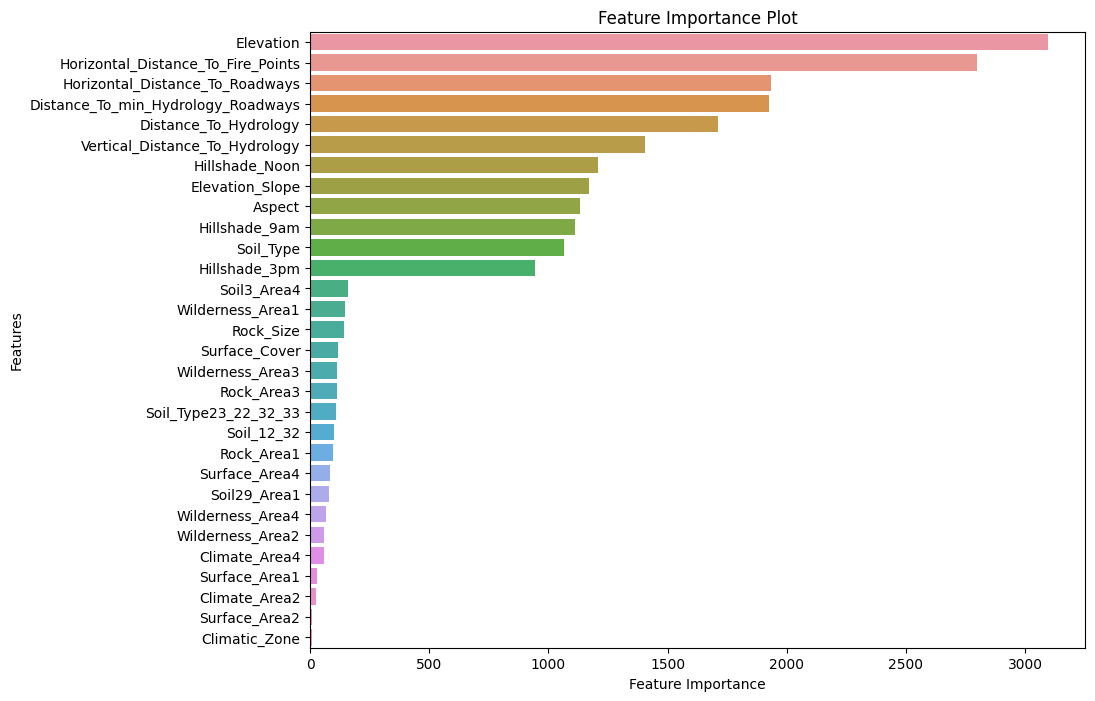

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Feature Importance Plot")
plt.show()

In [ ]:
lg_pred = lg.predict(test.drop(["Id"],axis = 1))

In [ ]:
lg_pred

array([2, 2, 1, ..., 3, 3, 3])

In [ ]:
submission  = pd.DataFrame({
    "Id":test["Id"],
    "Cover_Type":lg_pred
})


In [ ]:
submission.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,1
3,15124,1
4,15125,1


In [ ]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>